In [1]:
import pandas as pd
import re

In [2]:
# Wczytywanie słowników
df_functions_dict = pd.read_csv('data/position_functions.csv')
df_country_dict = pd.read_csv('data/position_country.csv')
df_industry_dict = pd.read_csv('data/position_industry.csv')
df_job_type_dict = pd.read_csv('data/position_job_type.csv')
df_qualifications_dict = pd.read_csv('data/position_qualifications.csv')
df_region_dict = pd.read_csv('data/position_region.csv')
df_salary_dict = pd.read_csv('data/position_salary.csv')
df_software_dict = pd.read_csv('data/position_software.csv')
df = open('data/data.xml','r', encoding="utf-8")
inside = df.read()
df.close()

In [3]:
# Wczytywanie danych
job_type = re.findall(r"<position_job_type>\s*(.*?)\s*<", inside)
employer_name = re.findall(r"<employer_name>\s*(.*?)\s*<", inside)
position_title = re.findall(r"<position_title>\s*(.*?)\s*<", inside)
position_ref = re.findall(r"<position_ref>\s*(.*?)\s*<", inside)
position_url = re.findall(r"<position_url>\s*(.*?)\s*<", inside)
position_industry = re.findall(r"<position_industry>\s*(.*?)\s*<", inside)
position_salary = re.findall(r"<position_salary>\s*(.*?)\s*<", inside)
position_salary_text = re.findall(r"<position_salary_text>\s*(.*?)\s*<", inside)
position_region = re.findall(r"<position_region>\s*(.*?)\s*<", inside)
position_country = re.findall(r"<position_country>\s*(.*?)\s*<", inside)
position_city = re.findall(r"<position_city>\s*(.*?)\s*<", inside)
position_software = re.findall(r"<position_software>\s*(.*?)\s*<", inside)
position_qualifications = re.findall(r"<position_qualifications>\s*(.*?)\s*<", inside)
position_functions = re.findall(r"<position_functions>\s*(.*?)\s*<", inside)

In [4]:
# Tworzenie ramki danych
data = pd.DataFrame()
data['position_ref'] = position_ref
data['position_title '] = position_title 
data['employer_name'] = employer_name
data['job_type'] = job_type
data['position_industry'] = position_industry
data['position_software'] = position_software
data['position_qualifications'] = position_qualifications
data['position_functions'] = position_functions
data['position_salary'] = position_salary
data['position_salary_text'] = position_salary_text
data['position_city'] = position_city
data['position_region'] = position_region
data['position_country'] = position_country
data['position_url'] = position_url

In [5]:
#Podgląd danych
print(data.head(1).T)

                                                                         0
position_ref                                                          1167
position_title                            Senior Insurance Product Manager
employer_name                                     Aegis Security Insurance
job_type                                                              1481
position_industry                                                6921,6924
position_software                                                         
position_qualifications                                              17215
position_functions                                       17220,17224,17217
position_salary                                                       5293
position_salary_text                          $120,000 - $160,000 per year
position_city                                                       Dallas
position_region                                                       2332
position_country         

In [6]:
print(df_job_type_dict)

   Target value Label value
0          2001    Contract
1          2002   Freelance
2          1481   Full Time
3          2003      Intern
4          2005   Job Share
5           350   Part Time
6            50   Temporary
7          2004   Volunteer


In [7]:
# Podmiana wartości job_type
index = 0
for w in df_job_type_dict["Target value"]:  
    data["job_type"].replace(str(df_job_type_dict.loc[index, "Target value"]), df_job_type_dict.loc[index, "Label value"], inplace=True)
    index = index + 1

# Podmiana wartości position_salary
index = 0
for w in df_salary_dict["Target value"]:  
    data["position_salary"].replace(str(df_salary_dict.loc[index, "Target value"]), df_salary_dict.loc[index, "Label value"], inplace=True)
    index = index + 1

# Podmiana wartości position_region
index = 0
for w in df_region_dict["Target value"]:  
    state = re.sub(r"\s*-.*",r"",df_region_dict.loc[index, "Label value"])
    data["position_region"].replace(str(df_region_dict.loc[index, "Target value"]), state, inplace=True)
    index = index + 1

# Podmiana wartości position_country
index = 0
for w in df_country_dict["Target value"]:  
    country = re.sub(r"(?i)\s*,\s*the\s*$",r"",df_country_dict.loc[index, "Label value"])
    data["position_country"].replace(str(df_country_dict.loc[index, "Target value"]), country, inplace=True)
    index = index + 1

data.head(1).T
#data.to_excel("output.xlsx")

,0
position_ref,1167
position_title,Senior Insurance Product Manager
employer_name,Aegis Security Insurance
job_type,Full Time
position_industry,"6921,6924"
position_software,
position_qualifications,17215
position_functions,"17220,17224,17217"
position_salary,"$100,000+"
position_salary_text,"$120,000 - $160,000 per year"


In [8]:
from IPython.display import display, HTML

# ile % ofert pracy ma informacje o ...

for x in ["employer_name","job_type","position_salary","position_city","position_region","position_country"]:
    empty_cells = (data[x] == "").sum()
    cells_count = data.shape[0]
    cells_nonempty = cells_count-empty_cells
    print(f"Liczba niepustych wierszy w kolumnie {x}: {cells_nonempty} [{int((cells_nonempty/cells_count)*100)}%]")
    print(f"Najpopularniejsze wartości:")
    # Tworzenie ramki danych z liczebnością wartości w kolumnie
    data_no_empty_rows = data[data[x] != ""]
    variable_counts_df = data_no_empty_rows[x].value_counts().to_frame()
    variable_counts_df.index.name = None
    display(HTML(variable_counts_df.head().to_html()))

Liczba niepustych wierszy w kolumnie employer_name: 4087 [100%]
Najpopularniejsze wartości:


,count
Willis Towers Watson,165
Munich Re,131
WTW,131
EY,125
PricewaterhouseCoopers,109


Liczba niepustych wierszy w kolumnie job_type: 4087 [100%]
Najpopularniejsze wartości:


,count
Full Time,4003
Part Time,53
Contract,21
Temporary,7
Volunteer,3


Liczba niepustych wierszy w kolumnie position_salary: 4087 [100%]
Najpopularniejsze wartości:


,count
Competitive,3019
"$100,000+",453
"$75,000 - $99,999",254
"$50,000 - $74,999",220
"$25,000 - $49,999",135


Liczba niepustych wierszy w kolumnie position_city: 3726 [91%]
Najpopularniejsze wartości:


,count
London,276
New York,193
Kuala Lumpur,142
Singapore,121
Chicago,105


Liczba niepustych wierszy w kolumnie position_region: 1962 [48%]
Najpopularniejsze wartości:


,count
New York,221
Illinois,161
Ontario,128
Texas,120
New Jersey,103


Liczba niepustych wierszy w kolumnie position_country: 4087 [100%]
Najpopularniejsze wartości:


,count
United States,1957
United Kingdom,478
Canada,206
Malaysia,162
Singapore,140


In [9]:
# Dla kolumn z wieloma wartościami
for y in [["position_industry",df_industry_dict], ["position_software",df_software_dict], ["position_qualifications",df_qualifications_dict], ["position_functions",df_functions_dict]]:
    all_values_in_column = []
    for j in [i.split(",") for i in data[y[0]].values]:
        for k in j:
            all_values_in_column.append(k)
    all_values_count = len(all_values_in_column)

    for x in [y[0]]:
        empty_cells = (data[x] == "").sum()
        cells_count = data.shape[0]
        cells_nonempty = cells_count-empty_cells
        print(f"Liczba niepustych wierszy w kolumnie {x}: {cells_nonempty} [{int((cells_nonempty/cells_count)*100)}%]")
        print(f"Najpopularniejsze wartości:")
        # Tworzenie ramki danych z liczebnością wartości w kolumnie
        s = pd.Series(all_values_in_column) 
        multi_variable_counts_df = s.value_counts().to_frame()
        multi_variable_counts_df.index.name = None
        if "" in multi_variable_counts_df.index:
            multi_variable_counts_df.drop(index=[""], inplace=True)
        multi_variable_counts_df["name"] = multi_variable_counts_df.index

        # Podmiana wartości w kolumnie name
        index = 0
        for w in y[1]["Target value"]: 
            multi_variable_counts_df["name"].replace(str(y[1].loc[index, "Target value"]), y[1].loc[index, "Label value"], inplace=True)
            index = index + 1

        multi_variable_counts_df.index.name = "id"
        #print(multi_variable_counts_df.head())
        display(HTML(multi_variable_counts_df.head().to_html()))

Liczba niepustych wierszy w kolumnie position_industry: 4080 [99%]
Najpopularniejsze wartości:


,count,name
id,,
6926,1423,Professional/Financial Services
6922,1172,Investment
6930,1021,Risk Management
6924,977,P&C/General Insurance/Non-Life
6923,969,Life Insurance


Liczba niepustych wierszy w kolumnie position_software: 2473 [60%]
Najpopularniejsze wartości:


,count,name
id,,
6256,1536,Excel
6276,1032,SQL
6269,808,R
6268,792,Python
6280,481,VBA


Liczba niepustych wierszy w kolumnie position_qualifications: 4087 [100%]
Najpopularniejsze wartości:


,count,name
id,,
17257,1769,Unclassified
17214,886,Part Qualified Actuary
17215,760,Fully Qualified Actuary
17216,456,Senior Qualified Actuary
17213,427,Graduate Actuary


Liczba niepustych wierszy w kolumnie position_functions: 4041 [98%]
Najpopularniejsze wartości:


,count,name
id,,
17220,3330,Product Development
17217,2580,Data Science
17218,1910,Pricing
17226,1849,Finance
17227,1738,Operations


In [10]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

industry_salary_df = pd.DataFrame()
industry_salary_df = data
industry_salary_df.position_industry = [i.split(",") for i in industry_salary_df.position_industry]
industry_salary_df = industry_salary_df.explode("position_industry")
industry_salary_df = industry_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
industry_salary_df.dropna(subset=['position_industry','position_salary'], inplace=True)

# Podmiana wartości w kolumnie industry
index = 0
for w in df_industry_dict["Target value"]: 
        industry_salary_df["position_industry"].replace(str(df_industry_dict.loc[index, "Target value"]), df_industry_dict.loc[index, "Label value"], inplace=True)
        index = index + 1


fig = px.histogram (  industry_salary_df,
                      x="position_industry",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji w różnych branżach",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()
#print(industry_salary_df["position_salary"].unique())

In [11]:
fig = go.Figure()

functions_salary_df = pd.DataFrame()
functions_salary_df = data
functions_salary_df.position_functions = [i.split(",") for i in functions_salary_df.position_functions]
functions_salary_df = functions_salary_df.explode("position_functions")
functions_salary_df = functions_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
functions_salary_df.dropna(subset=['position_functions','position_salary'], inplace=True)

# Podmiana wartości w kolumnie functions
index = 0
for w in df_functions_dict["Target value"]: 
        functions_salary_df["position_functions"].replace(str(df_functions_dict.loc[index, "Target value"]), df_functions_dict.loc[index, "Label value"], inplace=True)
        index = index + 1


fig = px.histogram (  functions_salary_df,
                      x="position_functions",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji pod względem pełnionych funkcji",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()

In [12]:
fig = go.Figure()

qualifications_salary_df = pd.DataFrame()
qualifications_salary_df = data
qualifications_salary_df.position_qualifications = [i.split(",") for i in qualifications_salary_df.position_qualifications]
qualifications_salary_df = qualifications_salary_df.explode("position_qualifications")
qualifications_salary_df = qualifications_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
qualifications_salary_df.dropna(subset=['position_qualifications','position_salary'], inplace=True)

# Podmiana wartości w kolumnie qualifications
index = 0
for w in df_qualifications_dict["Target value"]: 
        qualifications_salary_df["position_qualifications"].replace(str(df_qualifications_dict.loc[index, "Target value"]), df_qualifications_dict.loc[index, "Label value"], inplace=True)
        index = index + 1


fig = px.histogram (  qualifications_salary_df,
                      x="position_qualifications",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji pod względem posiadanych kwalifikacji",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()
#print(qualifications_salary_df["position_salary"].unique())

In [13]:
fig = go.Figure()

software_salary_df = pd.DataFrame()
software_salary_df = data
software_salary_df.position_software = [i.split(",") for i in software_salary_df.position_software]
software_salary_df = software_salary_df.explode("position_software")
software_salary_df = software_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
software_salary_df.dropna(subset=['position_software','position_salary'], inplace=True)

# Podmiana wartości w kolumnie software
index = 0
for w in df_software_dict["Target value"]: 
        software_salary_df["position_software"].replace(str(df_software_dict.loc[index, "Target value"]), df_software_dict.loc[index, "Label value"], inplace=True)
        index = index + 1


fig = px.histogram (  software_salary_df,
                      x="position_software",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji pod względem wykorzystywanych oprogramowań",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()
#print(software_salary_df["position_salary"].unique())

In [14]:
fig = go.Figure()

country_salary_df = pd.DataFrame()
country_salary_df = data
country_salary_df = country_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
country_salary_df.dropna(subset=['position_country','position_salary'], inplace=True)

fig = px.histogram (  country_salary_df,
                      x="position_country",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'                      
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji w różnych krajach",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()
#print(country_salary_df["position_salary"].unique())

In [15]:
fig = go.Figure()

job_type_salary_df = pd.DataFrame()
job_type_salary_df = data
job_type_salary_df = job_type_salary_df.replace(r'^\s*$|^\s*Competitive\s*$', float('NaN'), regex = True)
job_type_salary_df.dropna(subset=['job_type','position_salary'], inplace=True)

fig = px.histogram (  job_type_salary_df,
                      x="job_type",
                      color="position_salary",
                      barnorm = "percent",
                      text_auto='.2f'                      
                ) \
        .update_layout (

                    title={
                            "text": "Analiza rozkładu pensji pod względem typów pracy",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')
fig.show()
#print(job_type_salary_df["position_salary"].unique())

In [16]:
# Przygotowanie ramki danych z szeregiem czasowym
post_dates_df = pd.read_csv('data/post_dates.csv')
post_dates_df = post_dates_df[post_dates_df['date_posted'].notna()]
post_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3361 entries, 0 to 3741
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_posted  3361 non-null   object
 1   url          3361 non-null   object
dtypes: object(2)
memory usage: 78.8+ KB


In [17]:
post_dates_df.head()

,date_posted,url
0,2023-12-22,https://career5.successfactors.eu/career?compa...
1,2023-11-06,https://careers.cbre.com/en_US/careers/JobDeta...
2,2024-01-02,https://unum.wd1.myworkdayjobs.com/external/jo...
3,2023-12-21,https://recruiting2.ultipro.com/MIL1017/JobBoa...
4,2023-11-09,https://recruiting2.ultipro.com/MIL1017/JobBoa...


In [18]:
hist_post_dates = post_dates_df['date_posted'].value_counts()
hist_post_dates.sort_index(inplace=True)
hist_post_dates.index = pd.to_datetime(hist_post_dates.index)
#hist_post_dates.head()
#hist_post_dates = hist_post_dates.resample('D').bfill()
#hist_post_dates.head(10)
#pd.date_range(start=hist_post_dates.index[0], end=, periods=5, freq='3M')
#hist_post_dates.reindex("date_posted", fill_value=0).reset_index()
# Tworzenie pełnego zakresu dat od pierwszej do ostatniej daty w obiekcie Series
full_date_range = pd.date_range(hist_post_dates.index.min(), hist_post_dates.index.max())
#full_date_range
# Uzupełnianie brakujących dat wartościami 0
hist_post_dates= hist_post_dates.reindex(full_date_range, fill_value=0)

# Wyświetlenie zaktualizowanego obiektu Series
hist_post_dates.head(10)

2023-07-17    4
2023-07-18    2
2023-07-19    3
2023-07-20    5
2023-07-21    0
2023-07-22    0
2023-07-23    0
2023-07-24    8
2023-07-25    6
2023-07-26    5
Freq: D, Name: count, dtype: int64

ADF Statistic: 1.0683873555162937
p-value: 0.9949375826037695


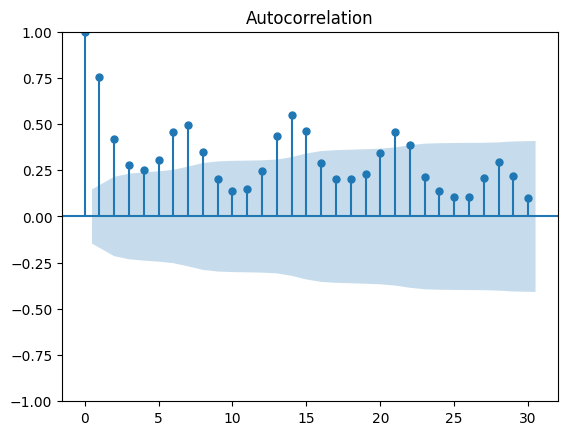

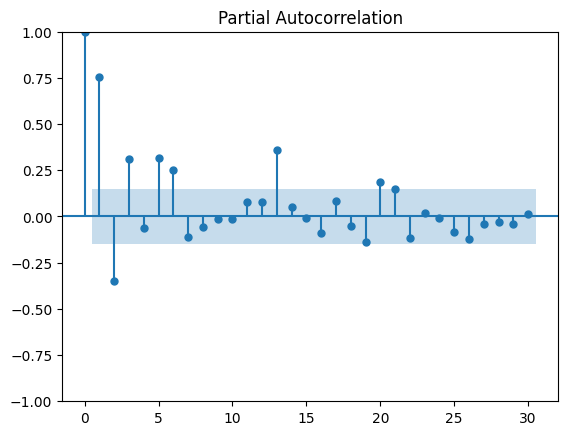

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Plot ACF and PACF
plot_acf(hist_post_dates, lags=30)
plot_pacf(hist_post_dates, lags=30)

# Augmented Dickey-Fuller Test
result = adfuller(hist_post_dates)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

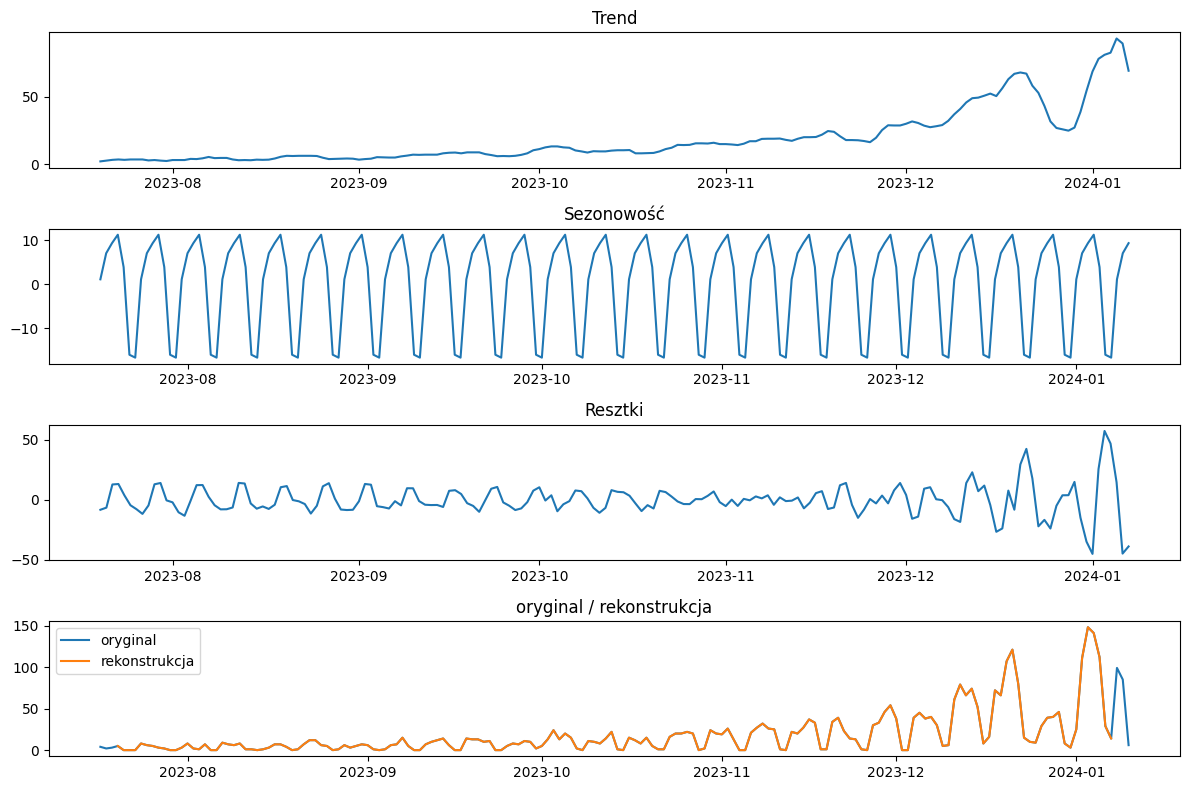

In [20]:
# Rozbicie na komponenty (trend, sezonowość, resztki)
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(hist_post_dates, model='additive', period=7) # period musimy dobrać w zależności od danych!


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Sezonowość')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Resztki')

plt.subplot(4, 1, 4)
plt.plot(hist_post_dates, label='oryginal')
plt.plot(decomposition.trend + decomposition.seasonal + decomposition.resid, label='rekonstrukcja')
plt.title('oryginal / rekonstrukcja')

plt.legend()

plt.tight_layout()
plt.show()

In [21]:
#Połączenie ramek danych w celu stworzenia wykresu zmiany wymaganych kwalifikacji w czasie
s5_data = data.copy()
s5_post_dates_df = post_dates_df.copy()

# Update the index for s5_data
s5_data.set_index("position_url", inplace=True)
s5_data = s5_data[~s5_data.index.duplicated(keep='first')]

# Update the index for s5_post_dates_df
s5_post_dates_df.set_index("url", inplace=True)
s5_post_dates_df = s5_post_dates_df[~s5_post_dates_df.index.duplicated(keep='first')]

# Concatenate the data frames
data_w_dates = pd.concat([s5_data, s5_post_dates_df], axis=1)

#data_w_dates.head()
qualifications_in_time_df = pd.DataFrame({"Qualifications": data_w_dates.position_qualifications, "post_date": data_w_dates.date_posted})
qualifications_in_time_df.dropna(axis=0, inplace=True)
qualifications_in_time_df.head()

,Qualifications,post_date
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,"[17215, 17216]",2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=c4497be8-d9c7-4158-bdd4-71db62fe8798,[17257],2023-11-09
https://careers.cbre.com/en_US/careers/JobDetail/Assistant-Financial-Controller-Karachi/142932,[17257],2023-11-06
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=ee332bbd-1934-49bc-a912-60adc688f4e6,[17214],2023-11-28
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=77237a8e-bf12-4133-8d32-680307ca16c5,[17214],2023-11-16


In [22]:
#Powielenie wierszy względem liczby wymaganych kwalifikacji
qualifications_in_time_df_expanded =  qualifications_in_time_df.explode('Qualifications')
qualifications_in_time_df_expanded.head()

,Qualifications,post_date
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17215,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17216,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=c4497be8-d9c7-4158-bdd4-71db62fe8798,17257,2023-11-09
https://careers.cbre.com/en_US/careers/JobDetail/Assistant-Financial-Controller-Karachi/142932,17257,2023-11-06
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=ee332bbd-1934-49bc-a912-60adc688f4e6,17214,2023-11-28


In [23]:
# Grupowanie według daty i kwalifikacji, i obliczanie procentowych udziałow
qualifications_in_time_df_expanded['post_date'] = pd.to_datetime(qualifications_in_time_df_expanded['post_date'])
qualifications_in_time_df_expanded.set_index('post_date', inplace=True)
grouped_qitde = qualifications_in_time_df_expanded.groupby([pd.Grouper(freq='W'), 'Qualifications']).size() / qualifications_in_time_df_expanded.groupby(pd.Grouper(freq='W')).size() * 100
result_qitde = grouped_qitde.reset_index(name='percentage').pivot(index='post_date', columns='Qualifications', values='percentage').fillna(0)
result_qitde.head()


Qualifications,17213,17214,17215,17216,17257
post_date,,,,,
2023-07-23,0.000000,23.076923,23.076923,7.692308,46.153846
2023-07-30,0.000000,33.333333,16.666667,11.111111,38.888889
2023-08-06,13.043478,21.739130,30.434783,8.695652,26.086957
2023-08-13,19.354839,16.129032,6.451613,6.451613,51.612903
2023-08-20,4.166667,8.333333,16.666667,12.500000,58.333333


In [24]:
# Zamiana dat na tekst, zeby matplotlib nie zmienial formatu daty
result_qitde.index = [re.sub(r"\s+\d+:.*","",str(i)) for i in result_qitde.index]
# Podmiana wartości nazw kolumn na tekst
index = 0
for i in result_qitde:
    #print(result_qitde.columns[index])
    index_2 = 0
    for t in df_qualifications_dict["Target value"]:
        if str(i) == str(t):
            result_qitde.rename(columns={i: df_qualifications_dict["Label value"][index_2]}, inplace=True)
        index_2 = index_2 + 1
    index = index + 1
result_qitde.head()


Qualifications,Graduate Actuary,Part Qualified Actuary,Fully Qualified Actuary,Senior Qualified Actuary,Unclassified
2023-07-23,0.000000,23.076923,23.076923,7.692308,46.153846
2023-07-30,0.000000,33.333333,16.666667,11.111111,38.888889
2023-08-06,13.043478,21.739130,30.434783,8.695652,26.086957
2023-08-13,19.354839,16.129032,6.451613,6.451613,51.612903
2023-08-20,4.166667,8.333333,16.666667,12.500000,58.333333


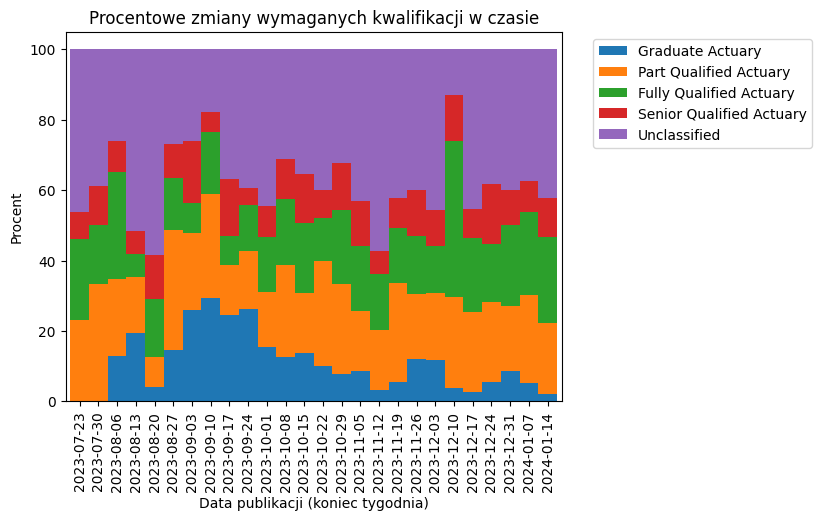

In [25]:
result_qitde.plot(kind='bar', stacked=True, width=1)
plt.title('Procentowe zmiany wymaganych kwalifikacji w czasie')
plt.xlabel('Data publikacji (koniec tygodnia)')
plt.ylabel('Procent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:

#data_w_dates.head()
functions_in_time_df = pd.DataFrame({"Functions": data_w_dates.position_functions, "post_date": data_w_dates.date_posted})
functions_in_time_df.dropna(axis=0, inplace=True)
functions_in_time_df.head()

,Functions,post_date
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,"[17223, 17220, 17222, 17226, 17217]",2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=c4497be8-d9c7-4158-bdd4-71db62fe8798,"[17223, 17226, 17220, 17218, 17227, 17222, 17217]",2023-11-09
https://careers.cbre.com/en_US/careers/JobDetail/Assistant-Financial-Controller-Karachi/142932,"[17226, 17219, 17217, 17227]",2023-11-06
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=ee332bbd-1934-49bc-a912-60adc688f4e6,"[17222, 17217, 17223, 17220, 17218, 17219]",2023-11-28
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=77237a8e-bf12-4133-8d32-680307ca16c5,"[17223, 17219, 17218, 17220, 17222, 17217]",2023-11-16


In [27]:
#Rozbicie wierszy względem liczby wymaganych funkcji
functions_in_time_df_expanded =  functions_in_time_df.explode('Functions')
functions_in_time_df_expanded.head()

,Functions,post_date
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17223,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17220,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17222,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17226,2023-09-21
https://recruiting2.ultipro.com/MIL1017/JobBoard/f54234e9-dfde-b183-fd20-4fbdb19cba7a/OpportunityDetail?opportunityId=b30b25c7-f8bb-44f0-8a2f-f7d0426e68e4,17217,2023-09-21


In [28]:
#Grupowanie według daty i kwalifikacji, i obliczanie procentowych udziałow
functions_in_time_df_expanded['post_date'] = pd.to_datetime(functions_in_time_df_expanded['post_date'])
functions_in_time_df_expanded.set_index('post_date', inplace=True)
grouped_fitde = functions_in_time_df_expanded.groupby([pd.Grouper(freq='W'), 'Functions']).size() / functions_in_time_df_expanded.groupby(pd.Grouper(freq='W')).size() * 100
result_fitde = grouped_fitde.reset_index(name='percentage').pivot(index='post_date', columns='Functions', values='percentage').fillna(0)
result_fitde.head()

Functions,,17217,17218,17219,17220,17221,17222,17223,17224,17225,17226,17227
post_date,,,,,,,,,,,,
2023-07-23,0.000000,20.000000,10.000000,8.000000,20.000000,0.000000,6.000000,6.000000,12.000000,0.0,6.000000,12.000000
2023-07-30,1.176471,11.764706,7.058824,12.941176,15.294118,1.176471,10.588235,7.058824,9.411765,0.0,11.764706,11.764706
2023-08-06,1.265823,12.658228,11.392405,11.392405,17.721519,0.000000,15.189873,3.797468,7.594937,0.0,13.924051,5.063291
2023-08-13,0.000000,19.672131,8.196721,6.557377,20.491803,0.000000,10.655738,8.196721,8.196721,0.0,6.557377,11.475410
2023-08-20,0.000000,13.592233,12.621359,8.737864,19.417476,1.941748,8.737864,9.708738,10.679612,0.0,7.766990,6.796117


In [29]:
# Zamiana dat na tekst, zeby matplotlib nie zmienial formatu daty
result_fitde.index = [re.sub(r"\s+\d+:.*","",str(i)) for i in result_fitde.index]
# Podmiana wartości nazw kolumn na tekst
index = 0
for i in result_fitde:
    index_2 = 0
    for t in df_functions_dict["Target value"]:
        if str(i) == str(t):
            result_fitde.rename(columns={i: df_functions_dict["Label value"][index_2]}, inplace=True)
        index_2 = index_2 + 1
    index = index + 1
result_fitde.head()


Functions,,Data Science,Pricing,Valuations,Product Development,Technical marketing,Risk management,Consulting,Underwriting,Executive assistant,Finance,Operations
2023-07-23,0.000000,20.000000,10.000000,8.000000,20.000000,0.000000,6.000000,6.000000,12.000000,0.0,6.000000,12.000000
2023-07-30,1.176471,11.764706,7.058824,12.941176,15.294118,1.176471,10.588235,7.058824,9.411765,0.0,11.764706,11.764706
2023-08-06,1.265823,12.658228,11.392405,11.392405,17.721519,0.000000,15.189873,3.797468,7.594937,0.0,13.924051,5.063291
2023-08-13,0.000000,19.672131,8.196721,6.557377,20.491803,0.000000,10.655738,8.196721,8.196721,0.0,6.557377,11.475410
2023-08-20,0.000000,13.592233,12.621359,8.737864,19.417476,1.941748,8.737864,9.708738,10.679612,0.0,7.766990,6.796117


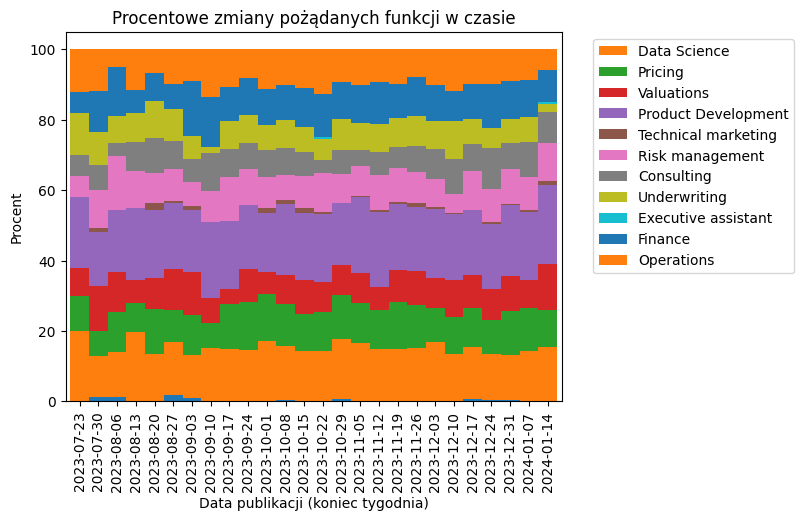

In [30]:
result_fitde.plot(kind='bar', stacked=True, width=1)
plt.title('Procentowe zmiany pożądanych funkcji w czasie')
plt.xlabel('Data publikacji (koniec tygodnia)')
plt.ylabel('Procent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
hist_post_dates.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 178 entries, 2023-07-17 to 2024-01-10
Freq: D
Series name: count
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [32]:
from statsmodels.tsa.arima.model import ARIMA
order = (22, 1, 22)  #zanik w ACF, ADF, zanik w PACF
model = ARIMA(hist_post_dates, order=order)
result = model.fit()
# Przewidywanie przyszłych wartości
future_dates = pd.date_range(start=hist_post_dates.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
predicted_values = result.predict(start=len(hist_post_dates), end=len(hist_post_dates) + len(future_dates) - 1, typ='levels')
predicted_values = predicted_values.round().astype(int)
predicted_values.head(7)

C:\Users\konra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\konra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\konra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\konra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\representati

2024-01-11     55
2024-01-12     88
2024-01-13     43
2024-01-14     37
2024-01-15     38
2024-01-16     40
2024-01-17    109
Freq: D, Name: predicted_mean, dtype: int32

In [33]:
#Łączenie danych historycznych i obecnych
combined_data = pd.concat([hist_post_dates, pd.Series(predicted_values, index=future_dates)])

In [34]:
fig = px.line(combined_data, x=combined_data.index, y=combined_data.values,
              color=['Actual'] * len(hist_post_dates) + ['Predicted'] * len(predicted_values),
              title='Jobs Posted Prediction (ARIMA)', line_shape='linear')

# Pokaż wykres
fig.show()